In [1]:
# standard libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sys
import warnings
warnings.filterwarnings('ignore')

# our libraries
home_path = '/home/nahuel.statuto/p-values'
sys.path.insert(0, home_path)

import sfit as s_fit
import functions as fn

/home/nahuel.statuto/.conda/envs/hw_tf2.8/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
importlib.reload(fn)
importlib.reload(s_fit)

<module 'sfit' from '/home/nahuel.statuto/p-values/sfit.py'>

In [12]:
def one_dim(x,dim,pos):
    for i in range(dim):
        if i!=(pos+1):
            x[:,i]=0
    return x
    

coef = [0.15,0.01,0.1,0.1]
expp = 2.5
noise_mean = 0.0
noise_var = 0.05
noise = 0.001
    
def model(X):
    return 3+4*X[0]+X[0]*X[1]+3*np.power(X[2],2)+2*X[3]*X[4]+ np.random.normal(noise_mean,noise_var)
    #return coef[0]*abs(X[0]) + coef[1]*np.exp(expp*abs(X[1])) + coef[2]*np.power(abs(X[2]+abs(X[3])+noise),coef[3]) + np.random.normal(noise_mean,noise_var)

def model_logX(X):
    return coef[0]*abs(X[0]) + coef[1]*np.power(abs(X[1]),expp) + coef[2]*np.power(abs(X[2]+abs(X[3])+noise),coef[3]) + np.random.normal(noise_mean,noise_var)

def toy_model(X,model,pos=None):
    ''' 
    funtion that returns a list with the y values using the input "X" and the function "model". 
    
    X: list of vectors. [ [],...,[] ].
    model: function te be evaluated .
    pos: integer value lower or equal to lengh of the X vectors. If pos=i, then y=[0,...,y_i,...,0] will be all 
        zeros except for the "i" position.
    '''
    x = X.copy()
    N,dim = np.shape(x)
    y = np.asarray([])
    
    if pos is not None:
        x = np.delete(one_dim(x,dim,pos),0,1)
        dim -= 1
    
    for i in range(N):
        aux = model([x[i]+np.random.uniform(0,noise_var,(1,dim))][0][0])
        y = np.concatenate((y, aux ), axis=None)
        
    if pos is None:
        return (y-np.mean(y))/(np.var(y))
    return y

In [13]:
dim = 7
N = 200
X = np.random.uniform(0,1,(N,dim))

y = toy_model(X,model)
#y2 = toy_model(X,model_logX)

In [14]:
variable_names = ['x'+str(j) for j in range(dim)]
X = sm.add_constant(X)
xname = variable_names
xname.insert(0,'const')

max_cores = 90
test_size = 0.25
beta_vec = [0.0] #np.arange(0.1e-3,2e-2,1e-3)
print('using {0} different beta values for the test'.format(len(beta_vec)))
k_folds = 10
n_runs = int(max_cores/k_folds)*k_folds
n_runs = 2 #int(max_cores/k_folds)*k_folds
layers=[[5,5]]

using 1 different beta values for the test


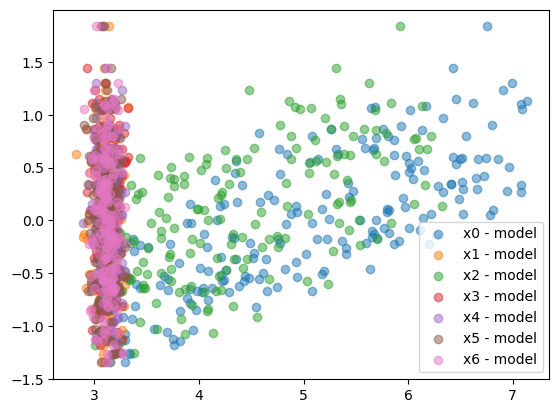

In [15]:
plt.figure()
for i in range(dim):
    plt.scatter(toy_model(X,model,pos=i),y,label=variable_names[i+1]+' - model', alpha=0.5)
plt.legend()
#plt.xlim(-3,100)
#plt.ylim(0.1,1000)

In [10]:
# Train models
second_order_bool = True
res = fn.different_models(X, y, k_folds, n_runs=n_runs, layers=layers, beta_vec=beta_vec, variable_names=variable_names, second_order_bool=second_order_bool)

/home/nahuel.statuto/.conda/envs/hw_tf2.8/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/nahuel.statuto/.conda/envs/hw_tf2.8/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-10-05 11:21:16.098703: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 11:21:16.112955: I tensorflow/core/common_runti

[(0.46963520161711425, 0.031, {0.0: [0, 0, 0, 0, 0, 0, 0]}, {}), (0.046035792744557665, 0.89, {0.0: [1, 1, 1, 1, 1, 0, 0]}, {})]
['const', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']
['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']


base_loss_linear: 0.012332019047232775
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     876.5
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          5.03e-142
Time:                        11:57:55   Log-Likelihood:                 155.77
No. Observations:                 200   AIC:                            -295.5
Df Residuals:                     192   BIC:                            -269.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

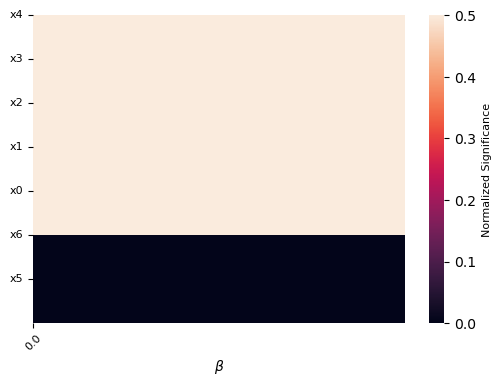

In [16]:
## OLS summary
print('base_loss_linear: {}'.format(res[0][3]))
print(res[0][0].summary(xname=xname))

## NN histograms
for result in res[1:]:
    print('base_loss: {}'.format(result[3]))
    print('r2: {}'.format(round(result[2],3)))
    fn.plot_heat_map(result[0], result[1], beta_vec=beta_vec)